In [1]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WsTJN-u4YRrPKqJTp8h8iUSAdfJC8_qn' -O house_price.csv
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GM3vMhalo6nkstKoCnE7cg_cSg179IJA' -O output.csv
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mw4HxSPCgPonXshqNjVLZBAxUVeYHvY-' -O amazon_dataset.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZsJWYHxcEdJQdb62diQf8o3fvXFawt1a' -O wine.csv

--2023-02-05 21:16:02--  https://docs.google.com/uc?export=download&id=1ZsJWYHxcEdJQdb62diQf8o3fvXFawt1a
Resolving docs.google.com (docs.google.com)... 142.250.78.46, 2800:3f0:4005:408::200e
Connecting to docs.google.com (docs.google.com)|142.250.78.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulaqg5g4ln1pak8apemaoiuol1ivcge6/1675649700000/03070346628187686991/*/1ZsJWYHxcEdJQdb62diQf8o3fvXFawt1a?e=download&uuid=2ab02631-b00b-4d96-a427-fa437a13270c [following]
--2023-02-05 21:16:03--  https://doc-0k-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulaqg5g4ln1pak8apemaoiuol1ivcge6/1675649700000/03070346628187686991/*/1ZsJWYHxcEdJQdb62diQf8o3fvXFawt1a?e=download&uuid=2ab02631-b00b-4d96-a427-fa437a13270c
Resolving doc-0k-6c-docs.googleusercontent.com (doc-0k-6c-docs.googleusercontent.com)... 142.250.78.129, 2800:3f0:4005:40b::2001


In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
def show_distribution(df:pd.DataFrame, col:str):
    print(df[col].value_counts().describe())
    df.hist(col)

count    96.000000
mean     16.656250
std      16.254443
min       1.000000
25%       4.000000
50%      11.500000
75%      26.000000
max      67.000000
Name: fixed acidity, dtype: float64


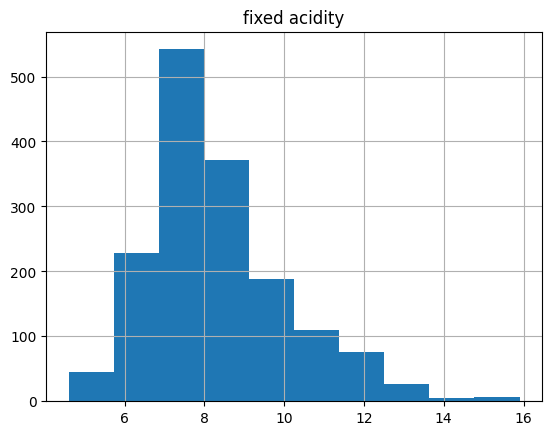

In [5]:

show_distribution(df, 'fixed acidity')

count    143.000000
mean      11.181818
std       12.228250
min        1.000000
25%        2.000000
50%        5.000000
75%       20.500000
max       47.000000
Name: volatile acidity, dtype: float64


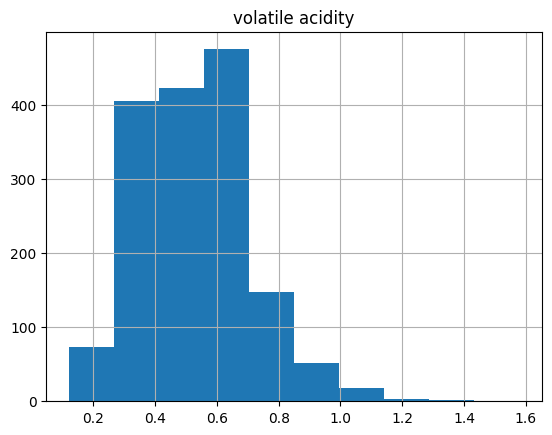

In [6]:
show_distribution(df, 'volatile acidity')

count     80.000000
mean      19.987500
std       17.844968
min        1.000000
25%        9.000000
50%       19.000000
75%       27.000000
max      132.000000
Name: citric acid, dtype: float64


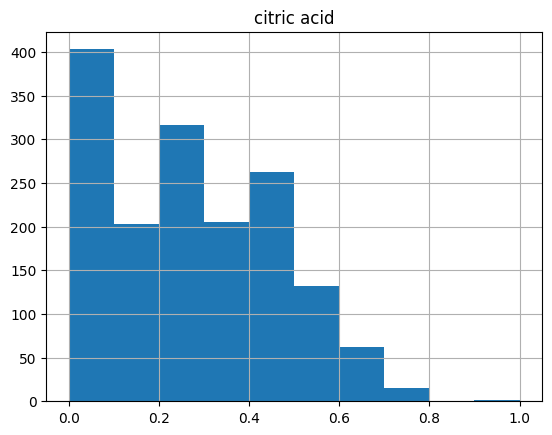

In [7]:
show_distribution(df, 'citric acid')

count     91.000000
mean      17.571429
std       35.057142
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      156.000000
Name: residual sugar, dtype: float64


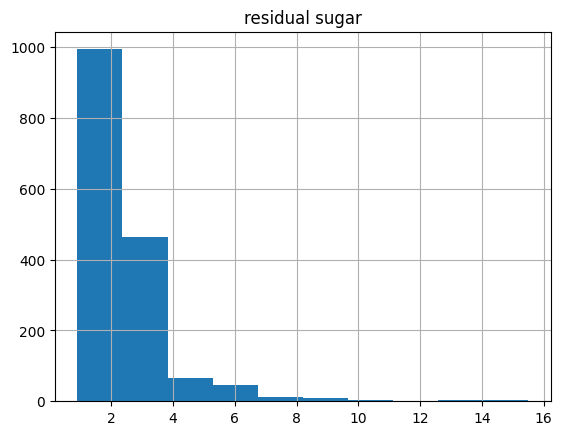

In [8]:
show_distribution(df, 'residual sugar')

count    153.00000
mean      10.45098
std       14.08664
min        1.00000
25%        1.00000
50%        3.00000
75%       16.00000
max       66.00000
Name: chlorides, dtype: float64


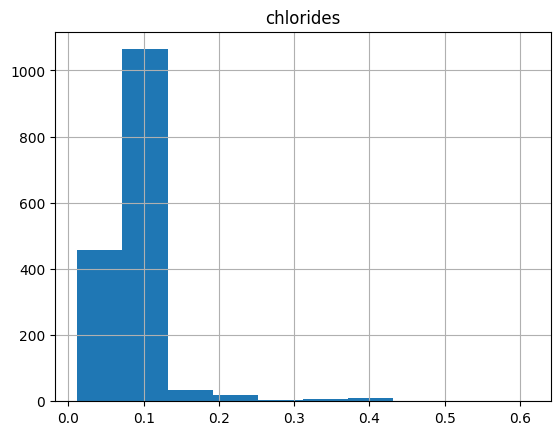

In [9]:
show_distribution(df, 'chlorides')

count     60.000000
mean      26.650000
std       29.820267
min        1.000000
25%        3.000000
50%       17.000000
75%       42.250000
max      138.000000
Name: free sulfur dioxide, dtype: float64


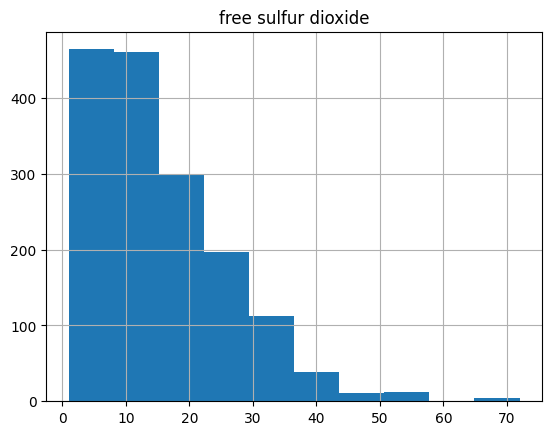

In [10]:
show_distribution(df, 'free sulfur dioxide')

count    144.000000
mean      11.104167
std       10.186869
min        1.000000
25%        3.000000
50%        7.000000
75%       17.000000
max       43.000000
Name: total sulfur dioxide, dtype: float64


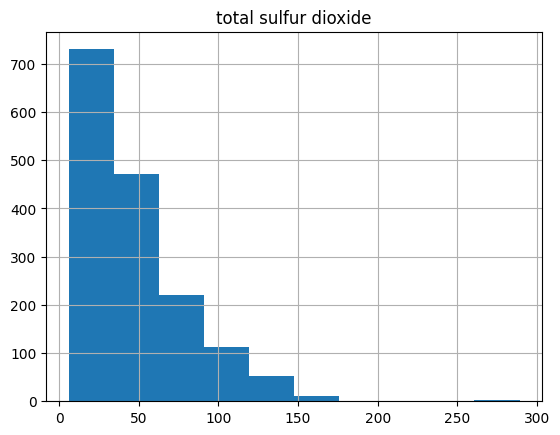

In [11]:
show_distribution(df, 'total sulfur dioxide')

count    436.000000
mean       3.667431
std        5.161034
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       36.000000
Name: density, dtype: float64


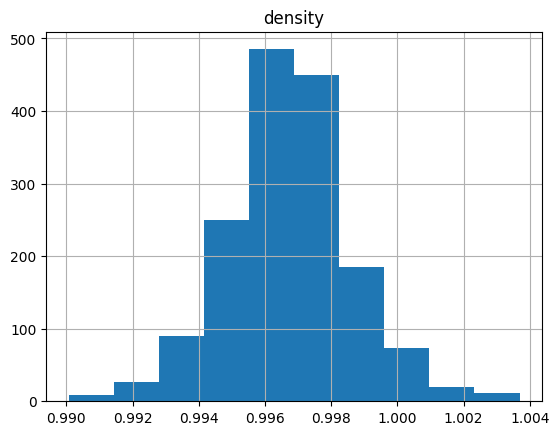

In [12]:
show_distribution(df, 'density')

count    89.000000
mean     17.966292
std      15.907009
min       1.000000
25%       4.000000
50%      11.000000
75%      32.000000
max      57.000000
Name: pH, dtype: float64


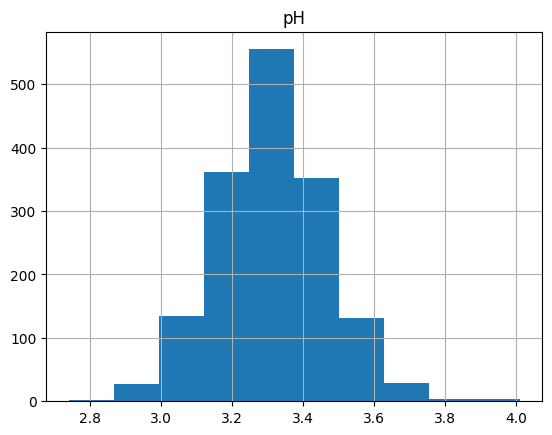

In [13]:
show_distribution(df, 'pH')

count    96.000000
mean     16.656250
std      18.926355
min       1.000000
25%       2.000000
50%       7.500000
75%      26.000000
max      69.000000
Name: sulphates, dtype: float64


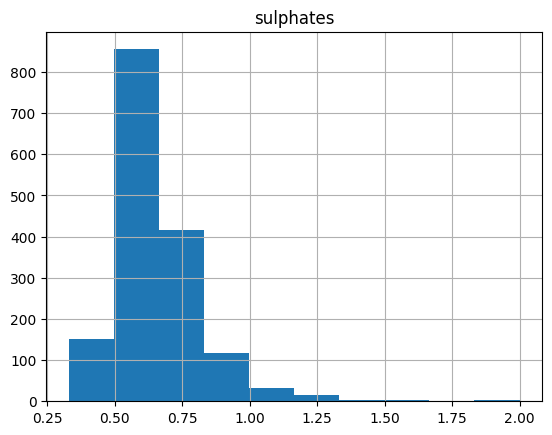

In [14]:
show_distribution(df, 'sulphates')

count     65.000000
mean      24.600000
std       27.930047
min        1.000000
25%        2.000000
50%       15.000000
75%       36.000000
max      139.000000
Name: alcohol, dtype: float64


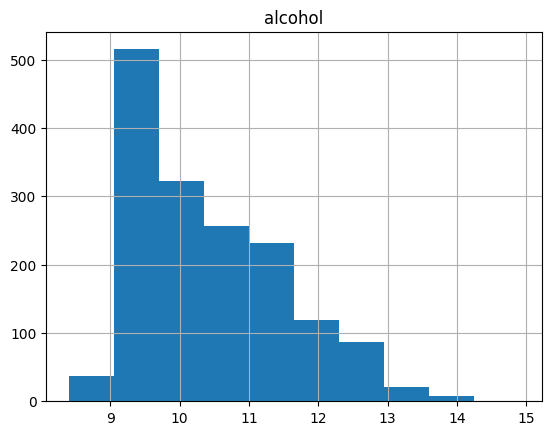

In [15]:
show_distribution(df, 'alcohol')

count      6.000000
mean     266.500000
std      312.251661
min       10.000000
25%       26.750000
50%      126.000000
75%      528.250000
max      681.000000
Name: quality, dtype: float64


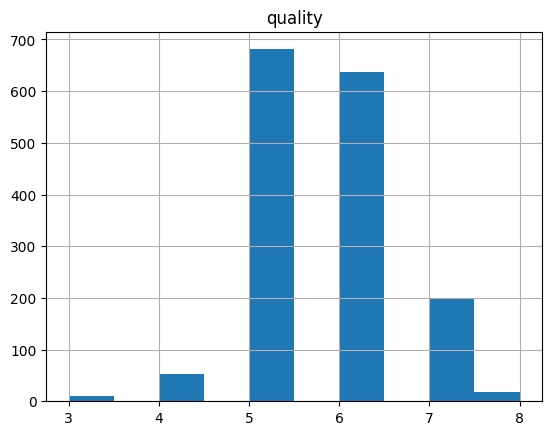

In [16]:
show_distribution(df, 'quality')

In [18]:

df.corr().style.background_gradient(cmap="coolwarm")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
x = df.drop('quality', axis=1)
y = df['quality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [21]:
model = DecisionTreeClassifier()
model = SVC()
model.fit(X_train, y_train)

SVC()

In [22]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [41]:
metrics.classification_report(expected_y, predicted_y, output_dict=True,zero_division=1)

{'3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6},
 '4': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14},
 '5': {'precision': 0.6842105263157895,
  'recall': 0.3551912568306011,
  'f1-score': 0.4676258992805755,
  'support': 183},
 '6': {'precision': 0.40789473684210525,
  'recall': 0.8435374149659864,
  'f1-score': 0.549889135254989,
  'support': 147},
 '7': {'precision': 1.0,
  'recall': 0.020833333333333332,
  'f1-score': 0.04081632653061225,
  'support': 48},
 '8': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 'accuracy': 0.475,
 'macro avg': {'precision': 0.8486842105263158,
  'recall': 0.20326033418832012,
  'f1-score': 0.17638856017769614,
  'support': 400},
 'weighted avg': {'precision': 0.6379276315789474,
  'recall': 0.475,
  'f1-score': 0.4209210653107452,
  'support': 400}}

In [42]:
print(metrics.classification_report(expected_y, predicted_y, zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        14
           5       0.68      0.36      0.47       183
           6       0.41      0.84      0.55       147
           7       1.00      0.02      0.04        48
           8       1.00      0.00      0.00         2

    accuracy                           0.48       400
   macro avg       0.85      0.20      0.18       400
weighted avg       0.64      0.47      0.42       400



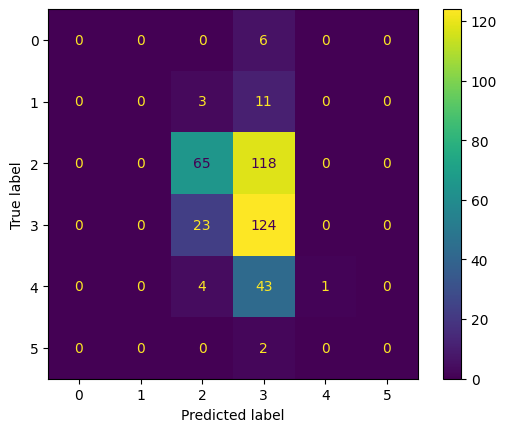

In [35]:
cm = metrics.confusion_matrix(y_test, predicted_y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [25]:
from joblib import dump, load

In [26]:
dump(model, 'model.joblib') 

['model.joblib']

In [28]:
model_loaded = load('model.joblib') 

In [32]:
model_loaded.predict(X_test[0:1])

array([5])

In [31]:
X_test[0:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
255,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3
